
# COGS 108 - Final Project
# Name: Yared Mekbib
# Github : YaredMekbib
## PID: A15525755


## Overview
I conducted a data science project in which I tried to discover if there were any relationships between a restaurant's food inspection scores, the general wealth of the area, and the yelp rating. I found out that there was a medium inverse relationship between a restaurant's yelp score and it's food inspection scores. There was no correlation between the other two relationships I investigated (score vs wealth, score vs percent nonwhite population).


## Research Question

Is there any relationship between a restaurant's food inspection scores and the general wealth of the area its located, the areas yelp rating, or the areas percent non-white population population?

## Background and Prior Work

As soon as I found out we would be doing a project around restaurant health inspection, I knew I wanted to see if I could figure out a relationship between accesible public resources and the restaurant's food inspection scores. This was so an individual, without knowing much about a region, would be able infer whether or not the restaurant they wanted to go to was clean. I scoured the internet and couldn't find a project like mine, so I decided to go ahead with it.

After doing research, I found that yelp was actually helping the city of Chicago by flagging restaurant's with low inspection scores on their app. This was something that had me interested, as yelp is an accessible public resource that could potentially be used in our analysis(ChicagoTribune). After getting the dataset, I did more research and I found that Raleigh and Charlotte, were some of the biggest cities in my dataset(files.nc.gov). Some of the other cities in my dataset had lower populations. This meant that my data had a good balance, and would be useful.


1. https://www.chicagotribune.com/business/ct-biz-yelp-health-scores-20200122-fyyeapmcabdyrpeexh4jsqidv4-story.html

2. https://files.nc.gov/ncosbm/documents/files/NC_PlaceEst2017.pdf



## Hypothesis
I hypothesize that the strongest relationship will exist as an inverse relationship between food inspection scores and the median household income of the area the restaurant is located. This is because restaurants in lower income area usually bring in less money, thus will have less resources to allocate to sanitation, thus will score lower on food inspection.


## Dataset

Dataset Name: zipcodes
Link to the data: From canvas
Number of observations: 39 observations

Features general information for each zipcode like income and percent nonwhite

Dataset Name: inspections
Link to the data: From canvas
Number of observations: 18467 observations

Features general information for each inspection like the date, address, city, code, and score


Dataset Name: restaurants
Link to the data: From canvas
Number of observations: 3325 observations

Features general information for each restaurant like name, zipcode, and phone number


Dataset Name: yelp
Link to the data: From canvas
Number of observations: 3689 observations

Features general information for each yelp review like the amount of reviews, and score.





The dataset I used was the one from the canvas page. It includes the zipcodes csv, inspections csv, restaurant csv, and yelp csv. I used zipcodes, median household income, inspection scores, nonwhite percent population, hsisid, and yelp ratings in my project. Zipcodes has the median household income of each zipcode. Inspections has the hsisid, and inspection scores. Restaurants has the zipcode. and Yelp has the yelp ratings for each zipcode.

1. I plan to create a new dataframe (df_restaurant_score_wealth) and merge the filtered df_restaurants and df_inspections on hsisid
2. I then will merge that dataframe (df_restaurant_score_wealth) with df_zip on zip
3. I then will merge that create a new dataframe (avg_wealth_score) and merge df_restaurant_score_wealth with df_zip on zip
4. Then I will merge avg wealth score with itself and df_yelp on zip



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read each file into corresponding dataframes

df_zip = pd.read_csv('zipcodes.csv')
df_inspections = pd.read_csv('inspections.csv')
df_restaurants = pd.read_csv('restaurants.csv')
df_yelp = pd.read_csv('yelp.csv')





## Data Cleaning - df_inspections

I removed all columns except score, hsisid, date, and zipcode. This was because all the other data was irrelevant. The data that remained would be used to merge into other dataframes. 

I renamed postalcode to zipcode so it would be easier to merge later on.

I also changed the type of data for the column zip to an int64 so it would be easier to manipulate later on

In [3]:
#Removed all columns except hsisid, date, score, and postal code
df_inspections = df_inspections.filter(['hsisid','date','score','postalcode'])

#Truncated the length of all postal code strings so it is only five digits
df_inspections['postalcode'] = df_inspections['postalcode'].str[0:5]

#Truncated the length of the date so it would be easier to use later on
df_inspections['date'] = df_inspections['date'].str[0:11]

#Renamed postalcode to zip
df_inspections = df_inspections.rename(columns = {'postalcode':'zip'})

#Changed the type of zip to int so it would be easier to manipulate later on
df_inspections['zip'] = df_inspections.zip.astype(int)


print(df_inspections)

           hsisid         date  score    zip
0      4092013748  2012-09-21T   96.0  27610
1      4092014046  2012-09-21T   98.0  27610
2      4092015191  2012-09-21T   97.0  27610
3      4092016122  2012-09-21T   99.0  27513
4      4092021513  2012-09-21T   97.0  27597
...           ...          ...    ...    ...
18461  4092021142  2016-11-03T   93.0  27616
18462  4092110100  2016-11-03T   97.0  27513
18463  4092110487  2016-11-03T   96.0  27519
18464  4092300177  2016-11-03T   99.0  27603
18465  4092300225  2016-11-03T   93.0  27597

[18466 rows x 4 columns]


## Data Cleaning - df_zip




I removed all the columns except zipcode, median household income, and percent nonwhite. This was so I could merge the restaurant's inspection score and household income together later on.

In [4]:
#Filtered columns into only zip, median_household_income, and percent nonwhite population

df_zip = df_zip.filter(['zip','median_household_income_dollars','percent_nonwhite'])

print(df_zip)

      zip  median_household_income_dollars  percent_nonwhite
0   27501                            51121              17.9
1   27502                            95857              18.9
2   27511                            67392              24.8
3   27513                            87262              27.8
4   27518                            98247              19.9
5   27519                           121815              35.2
6   27520                            58455              23.5
7   27522                            59221              31.4
8   27523                            68342              22.4
9   27526                            66025              22.5
10  27529                            59613              33.9
11  27539                            82614              19.0
12  27540                            88638              19.7
13  27545                            60825              44.4
14  27560                            80324              53.3
15  27562               

## Data Cleaning - df_yelp

I removed all columns except zip code and yelp rating, this was so I could merge them later on. I also took the mean of the yelp rating for each zip code. This was so I could analyze results more easily

In [5]:
#Filter yelp data so it only featured the zip code and yelp rating
df_yelp = df_yelp.filter(['zip_code','rating']) 
df_yelp.columns = ['zip','yelp_rating']
#Took the mean of the yelp rating for each zip code
df_yelp = df_yelp.groupby('zip', as_index=False)['yelp_rating'].mean()
print(df_yelp)

       zip  yelp_rating
0    15035         1.00
1    22701         4.00
2    27023         3.75
3    27041         4.50
4    27203         4.00
..     ...          ...
112  28557         5.00
113  28573         5.00
114  28578         5.00
115  28587         5.00
116  32256         4.00

[117 rows x 2 columns]


## Data Cleaning - df_restaurant


I removed all columns except hsisid and city. This is so we can merge the restaurant with their respective inspection scores and zipcode.

In [6]:
#Removed all columns except hsisid, and city


df_restaurants = df_restaurants.filter(['hsisid','city','name'])
print(df_restaurants)


          hsisid         city                                      name
0     4092017230      RALEIGH                             SPRING CAFE 2
1     4092040338         APEX  CAROLINA CLASSIC HOT DOGS #2 (WCID #549)
2     4092014444  WAKE FOREST                          Taco Bell #22798
3     4092015333      RALEIGH                          THE REMEDY DINER
4     4092160069      ZEBULON                   ZEBULON HOUSE (KITCHEN)
...          ...          ...                                       ...
3319  4092016658       GARNER                             LA ROMA PIZZA
3320  4092016663      RALEIGH                              BOJANGLES #5
3321  4092016557  Wake Forest                        BURGER KING #19795
3322  4092017227  MORRISVILLE                                   QUICKLY
3323  4092017274  WAKE FOREST               HARRIS TEETER #43 STARBUCKS

[3324 rows x 3 columns]


## Data Cleaning - df_restaurant_score_wealth
Here I merged df_restaurant and df_inspections so the restaurants' inspection score and the restaurants were paired together

Then I merged that dataframe with df_zip so each restaurant had an inspection score, zipcode, inspection date, median household income, and hsisid.

Text(0, 0.5, 'Number of Data Points')

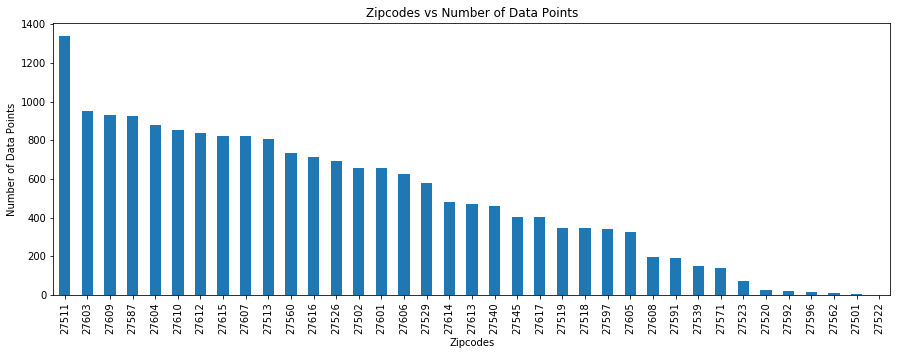

In [7]:
#Merge df_restaurant and df_inspection

df_restaurant_score_wealth = pd.merge(df_restaurants,df_inspections, how = 'inner', on = 'hsisid')

#df_zip didnt have some zips for first df_Restaurant_Score_Wealth

df_restaurant_score_wealth = pd.merge(df_restaurant_score_wealth, df_zip, how = 'inner', on = 'zip')


#Create a bar plot with the number of data points for each zip code
cleaningPlot = df_restaurant_score_wealth['zip'].value_counts().plot.bar(figsize=(15,5),title='Zipcodes vs Number of Data Points')

cleaningPlot.set_xlabel("Zipcodes")
cleaningPlot.set_ylabel("Number of Data Points")




This data shows that the zipcodes do not have the same amount of data points. This is probably because some zipcodes have more restaurants so they received more inspections. This is probably because some restaurants are in urban locations while others are more rural

This discrepancy is something to keep in mind as we continue to the data analysis section as a possible bias.

## Data Cleaning - avg_wealth_score

I then created a new dataframe avg_wealth_score, in which the median_household_income of each zipcode was displayed with the corresponding average score (for the zipcode). 

I also merged df_yelp with the new dataframe. 

This was so each zipcode had an average yelp rating as well.

All in all, avg_wealth_score has median_household income of each zipcode, the zipcode's score, the zipcode, nonwhite percent population, and the yelp rating



In [8]:
#Group df_restaurant_score_wealth by household income and take the average. Equate to avg_wealth_score
avg_wealth_score = df_restaurant_score_wealth.groupby('median_household_income_dollars', as_index=False)['score'].mean()

#Filter avg_wealth_score so it only included median household income and the score
avg_wealth_score = avg_wealth_score.filter(['median_household_income_dollars','score'])

#Merge zipcodes with their respectives household incomes, so median income, score, and zip are featured
avg_wealth_score =  pd.merge(avg_wealth_score, df_zip, how = 'inner', on = 'median_household_income_dollars')

#Merge avg_wealth_score with the df_yelp,so yelp scores are featured
avg_wealth_score = pd.merge(avg_wealth_score,df_yelp, how = 'inner', on = 'zip')

print(avg_wealth_score)


    median_household_income_dollars      score    zip  percent_nonwhite  \
0                             27564  96.023700  27601              69.9   
1                             44422  96.641374  27606              31.8   
2                             45209  96.265258  27610              72.7   
3                             49309  96.459877  27605              14.8   
4                             50365  95.510227  27604              41.3   
5                             50868  96.997409  27591              32.8   
6                             51121  94.750000  27501              17.9   
7                             51266  96.519174  27597              26.3   
8                             53640  96.167384  27609              27.2   
9                             53825  96.496951  27607              25.0   
10                            54889  96.019474  27603              25.6   
11                            56323  96.403226  27616              52.6   
12                       

## Data Analysis and Results - Descriptive Analysis

In [9]:
avg_wealth_score.describe()

,median_household_income_dollars,score,zip,percent_nonwhite,yelp_rating
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,67806.054054,96.359787,27570.378378,28.059459,3.614655
std,18969.048072,0.779195,41.121332,14.509010,0.258487
min,27564.000000,94.750000,27501.000000,8.700000,3.000000
25%,53825.000000,95.659091,27526.000000,18.900000,3.519663
50%,61097.000000,96.418969,27591.000000,23.500000,3.610526
75%,81809.000000,96.795620,27607.000000,31.800000,3.707006
max,121815.000000,98.250000,27617.000000,72.700000,4.500000


Used describe() to better understand how our data is distributed for the avg_wealth_score.

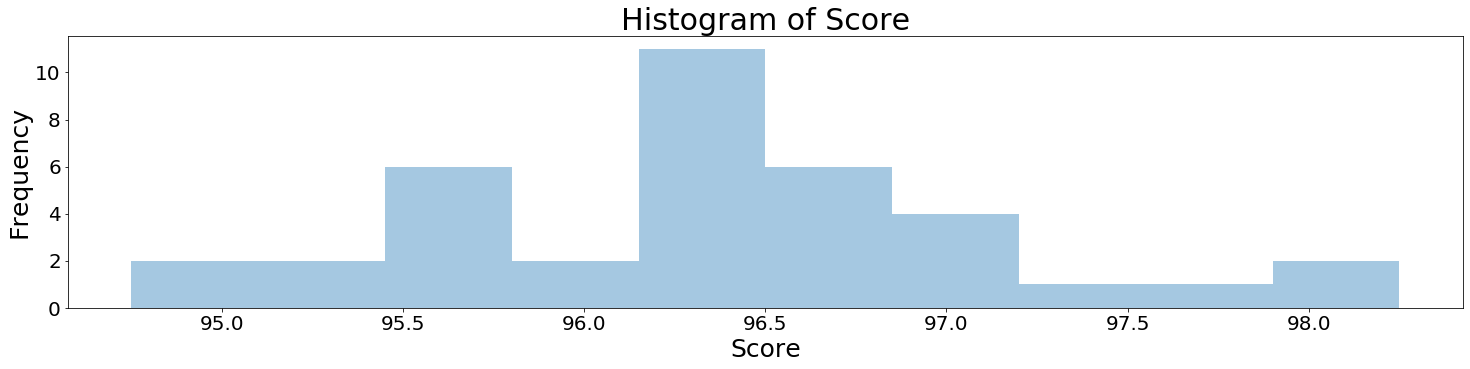

In [10]:
fig_area = (25, 5)
fig,ax = plt.subplots(figsize=fig_area)
distPlot1 = sns.distplot((avg_wealth_score["score"]), kde = False, bins = 10)
distPlot1.set_title('Histogram of Score',fontsize = 30)
distPlot1.set_xlabel('Score', fontsize=25)
distPlot1.set_ylabel('Frequency', fontsize=25)
distPlot1.tick_params(labelsize=20)







### Histogram of Score

I then plotted a histogram graph to understand the general distribution of the restaurant scores. Its pretty evenly distributed, with a slight skew to the right. This means the mean will be slightly greater than the median. This is because most inspection scores are in an around the 95 to 98 range.

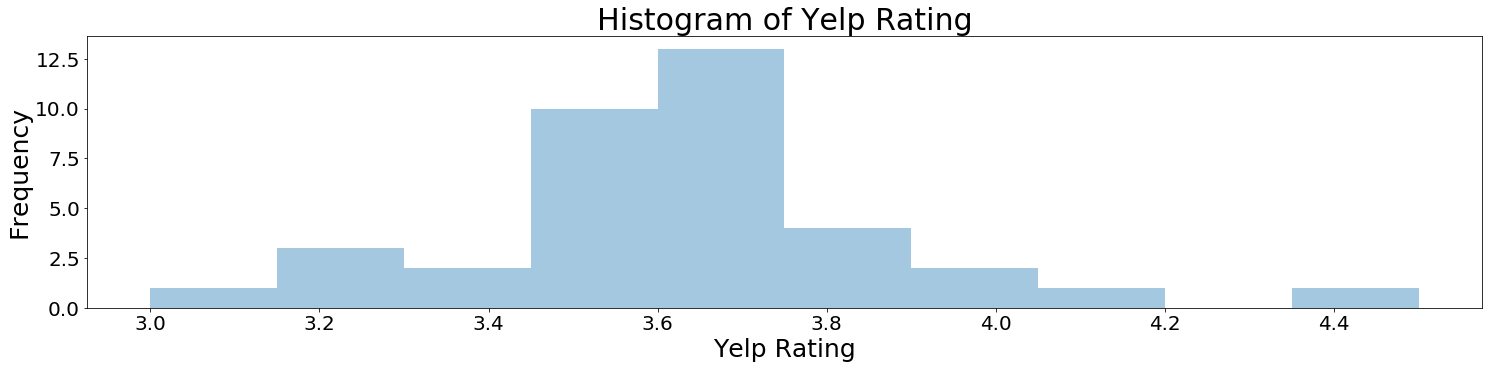

In [11]:
fig_area = (25, 5)
fig,ax = plt.subplots(figsize=fig_area)
distPlot2 = sns.distplot((avg_wealth_score["yelp_rating"]), kde = False, bins = 10)
distPlot2.set_title('Histogram of Yelp Rating',fontsize = 30)
distPlot2.set_xlabel('Yelp Rating', fontsize=25)
distPlot2.set_ylabel('Frequency', fontsize=25)
distPlot2.tick_params(labelsize=20)




### Histogram of Yelp Rating

I then plotted a histogram graph to understand the general distribution of avg yelp ratings for each zipcode. It's pretty evenly distirbuted, with a slight skew to the right. This means the mean will be slightly greater than the median. The yelp ratings are definitely lower than I would have expected

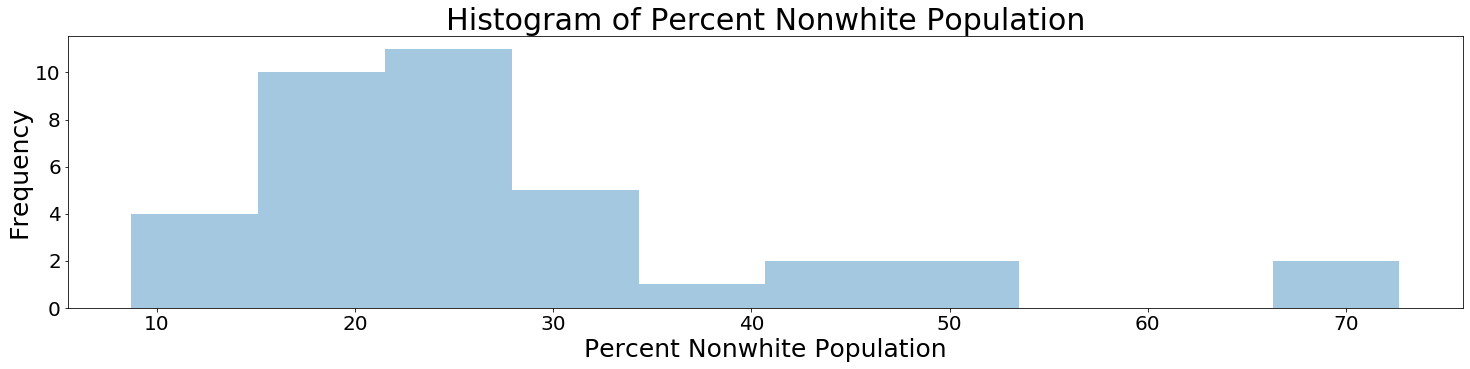

In [12]:
fig_area = (25, 5)
fig,ax = plt.subplots(figsize=fig_area)
distPlot3 = sns.distplot((avg_wealth_score["percent_nonwhite"]), kde = False, bins = 10)
distPlot3.set_title('Histogram of Percent Nonwhite Population',fontsize = 30)
distPlot3.set_xlabel('Percent Nonwhite Population', fontsize=25)
distPlot3.set_ylabel('Frequency', fontsize=25)
distPlot3.tick_params(labelsize=20)




### Histogram of Percent Nonwhite Population

I then plotted a histogram graph to understand the general distribution of avg yelp ratings for each zipcode. It is definitely skewed right here, this meant the mean will be greater than the average. This also shows that the majority of our data are in majority white populations.

## Data Analysis and Results - Exploratory Analysis - Plots

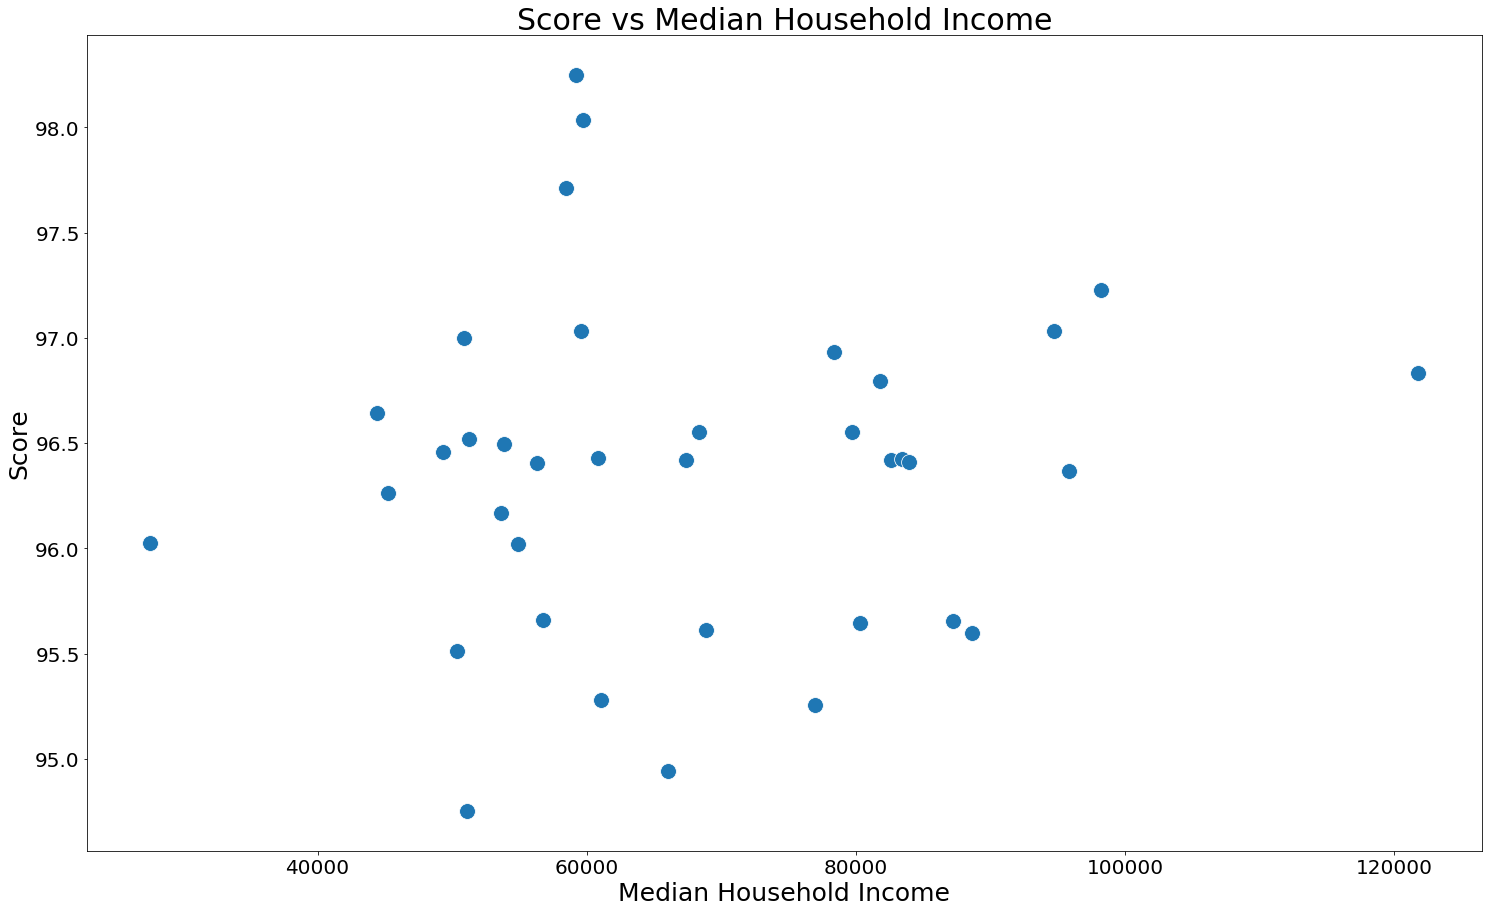

In [13]:

fig_area = (25, 15)
fig,ax = plt.subplots(figsize=fig_area)
scatterPlot1 = sns.scatterplot(x="median_household_income_dollars", y="score", data = avg_wealth_score, s= 250)
scatterPlot1.set_xlabel('Median Household Income', fontsize=25)
scatterPlot1.set_ylabel('Score', fontsize = 25)

scatterPlot1.set_title("Score vs Median Household Income", fontsize=30)
scatterPlot1.tick_params(labelsize=20)



### Score vs Median Household Income

I plotted another graph, this time a scatter to see if there were any relationships between Median Household Income and the average Inspection Score (each median household income is connected with its corresponding score which is tied to the zipcode). The reltionship between the two variables doesn't seem to exist

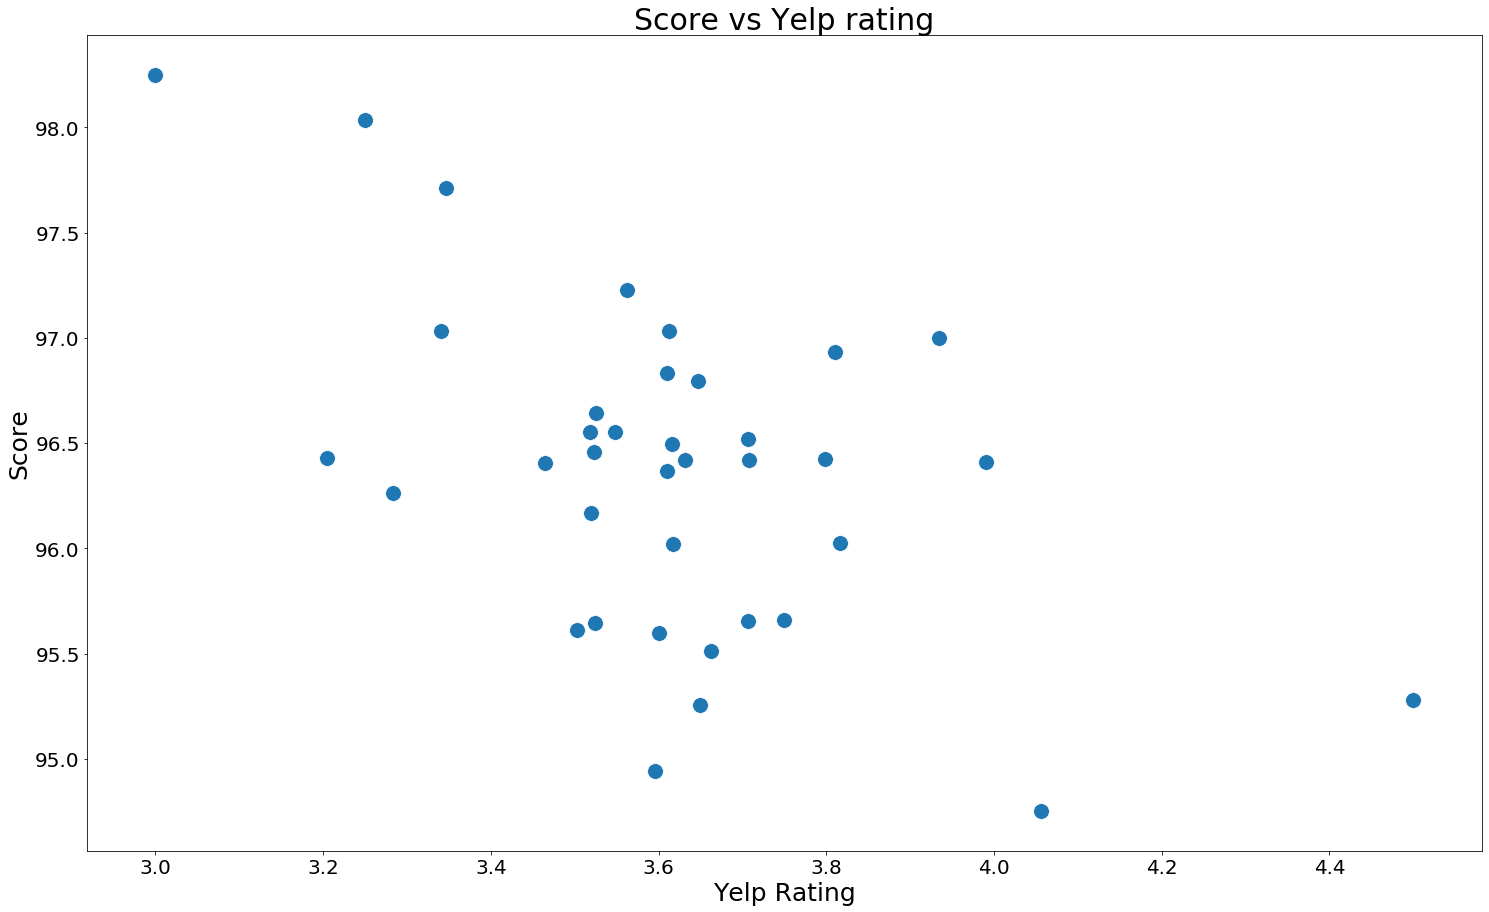

In [14]:
fig_area = (25, 15)
fig,ax = plt.subplots(figsize=fig_area)
scatterPlot2 = sns.scatterplot(x="yelp_rating", y="score", data = avg_wealth_score, s= 250)
scatterPlot2.set_xlabel('Yelp Rating', fontsize=25)
scatterPlot2.set_ylabel('Score', fontsize = 25)

scatterPlot2.set_title("Score vs Yelp rating", fontsize=30)
scatterPlot2.tick_params(labelsize=20)


### Score vs Yelp Rating

I plotted another graph, this time a scatter to see if there were any relationships between Yelp rating and the average Inspection Score (each median household income is connected with its corresponding score which is tied to the zipcode). From this I believe we can infer there is an inverse relationship. As you increase in yelp rating, the inspection scores seems to decrease. 

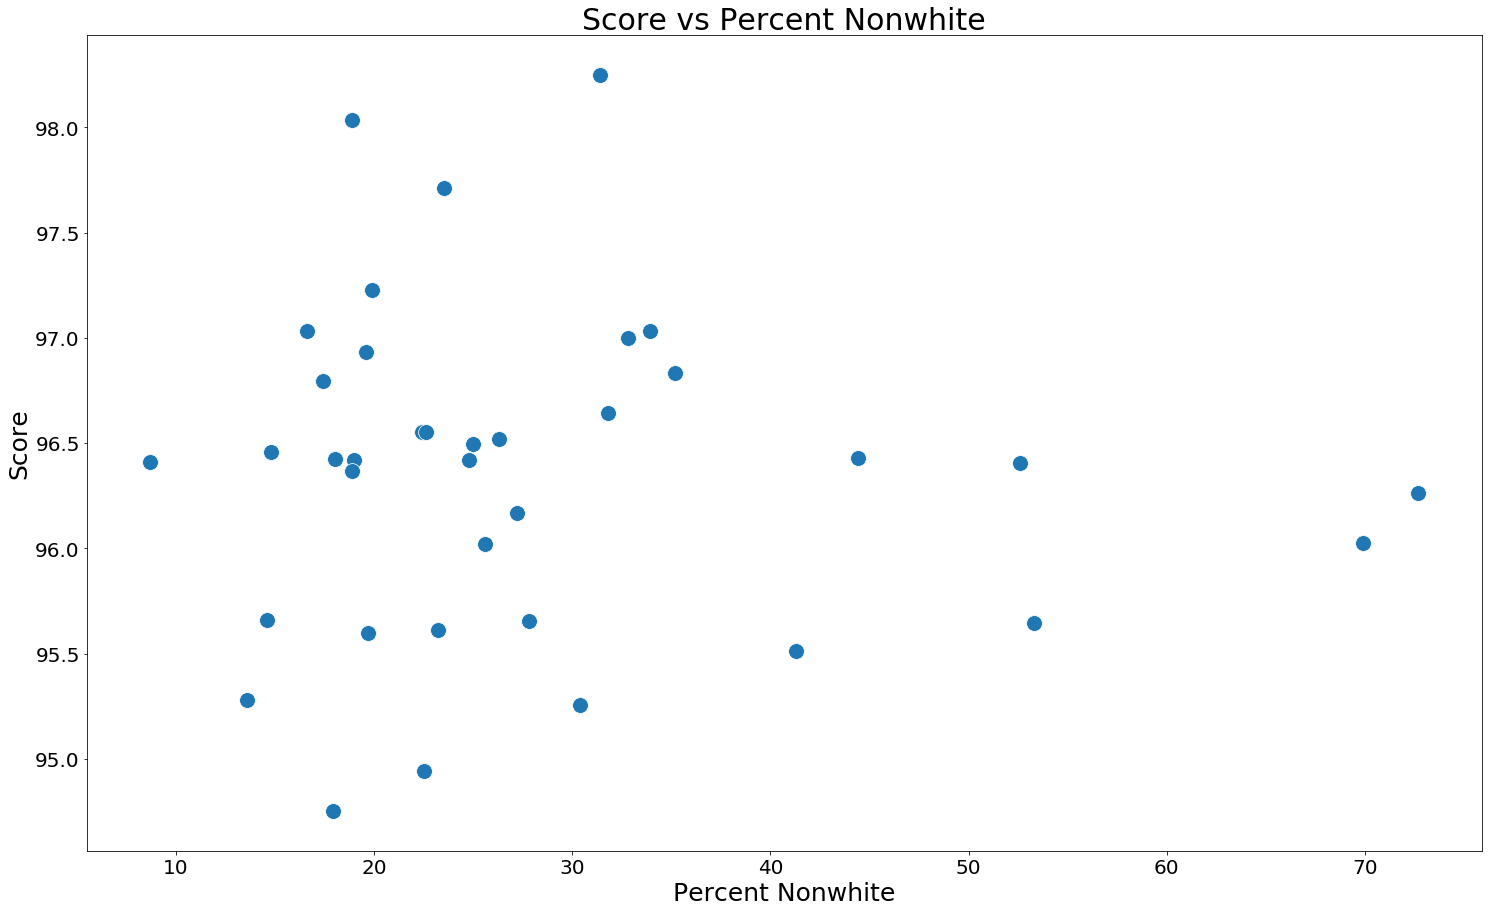

In [15]:
fig_area = (25, 15)
fig,ax = plt.subplots(figsize=fig_area)
scatterPlot3 = sns.scatterplot(x="percent_nonwhite", y="score", data = avg_wealth_score, s= 250)
scatterPlot3.set_xlabel('Percent Nonwhite', fontsize=25)
scatterPlot3.set_ylabel('Score', fontsize = 25)

scatterPlot3.set_title("Score vs Percent Nonwhite", fontsize=30)
scatterPlot3.tick_params(labelsize=20)


### Score vs Percent Nonwhite

I plotted another graph, this time a scatter plot to see if there were any relationships between Percent of Nonwhite people and the average Inspection Score. This scatter doesn't indicate much of a relationship. 

## Data Analysis and Results - Exploratory Analysis - Pearson's Correlational Coefficient

I then performed Pearson's correlational coefficient calculations between all three plots to further investigate the numerical relationships of each


In [16]:
corrs = avg_wealth_score.corr(method ='pearson') 
print(corrs)

                                 median_household_income_dollars     score  \
median_household_income_dollars                         1.000000  0.088614   
score                                                   0.088614  1.000000   
zip                                                    -0.351262 -0.027018   
percent_nonwhite                                       -0.388100 -0.054237   
yelp_rating                                             0.054720 -0.527777   

                                      zip  percent_nonwhite  yelp_rating  
median_household_income_dollars -0.351262         -0.388100     0.054720  
score                           -0.027018         -0.054237    -0.527777  
zip                              1.000000          0.158640     0.066926  
percent_nonwhite                 0.158640          1.000000    -0.326597  
yelp_rating                      0.066926         -0.326597     1.000000  


### Correlational Coefficients

#### Score and Percent Nonwhite = -0.054231
#### Score and Median Household Income = 0.088614
#### Score and Yelp Rating = -0.527777

I found that Score and Yelp rating has a small negative linear relationship (.52 = small correlation), with Score and Median Household Income, and Score and Percent Nonwhite having no correlation.

This means that as you increase in the Yelp rating, the average inspection score within any of the restaurants in the zipcode area will decrease.


## Ethics

For this project I used data that Professor Ellis gave us on canvas. This data was from the Wake County health department, which is a public institution. This means anybody can access the information. None of the information I used had personal information, so this project can be published if need be.

I believe the question I asked was perfectly acceptable. It didn't target any groups or individuals, specifically or maliciously, and the results of the project aren't harmful or discriminatory in any manner.

Despite the results of the study, a bias could definitely exist, which I addressed earlier in the report. The distribution of data points for each of the zipcodes was uneven. This meant that some zipcodes had more data points than others, which meant that some zipcodes were more accurate in their representation of reality (fewer data points = higher chance of disruptive outliers).




## Conclusion and Discussion

The plots and calculations shows that our hypothesis was actually incorrect. There was no relationship between the median household income (Wealth of a community) and the health inspection scores.

In fact, the strongest relationship I found was a small, inverse relationship between the Yelp rating and inspection scores. Score and Percent Nonwhite/Median household income did not feature a correlation. Out of the three relationships I tested, this was the one I thought would be least correlated.

In terms of limitations, there is definitely some that exist. One of which was the uneven distribution of data points for the zipcodes. This could skew our data in different directions. Another limitation was that zipcode is not an accurate representation of the wealth of an area. There are many places, especially in America, where the zipcodes are the exact same but there is a huge income inequality half a mile in a certain direction. Unfortunately, this was the best I could do with the data given. Another limitation was the yelp reviews. Some establishments had more yelp reviews than others which could have had an impact on the relationship.

In a dream scenario, instead of using zipcodes and pairing them with the median household income, I would divide communities based on the  average amount of wealth and compare inspection ratings in each community. I would do the same for yelp rating and Percent nonwhite population. This would give me a more accurate representation across the board. This data would definitely need to be implemented on a larger scale to verify the project's validity. 

